# Trajectory of a spinning ball

Forces which will be experienced:

Gravity: $$ \mathbf{F}_G = m\mathbf{g} $$

Air Resistance: $$ \mathbf{F}_D = -\frac{1}{2}\rho C_D A v^2 \ \hat{\mathbf{v}} $$

Magnus effect: $$ \mathbf{F}_M = S(\boldsymbol{\omega} \times \mathbf{v}) $$

Where:

$m$ - mass of the ball

$g$ - gravitational field the ball is moving in

$\rho$ - density of the fluid the ball is travelling through

$C_D$ - drag coefficient 

$A$ - cross sectional area of ball

$v$ - velocity of the ball

$S$ - air resistance coefficient across the surface of the object

$\omega$ - angular velocity of the ball

If we assume the ball is a baseball and is travelling through air then we can assume the following values, [see here](http://physics.wooster.edu/JrIS/Files/nowicki.pdf):

$m$ = 0.145 kg

$\rho$ = 1.29 kg/m$^3$

$C_D$ = 0.29

$A$ = 0.25 x $\pi$ x 7.32 cm$^2$

$S/m$ = 4.1 x 10$^{-4}$



In [10]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

# mass
m = 0.145                   # kg

# gravitational field
g = np.array([0.,0.,-9.81]) # N/kg

# density of fluid
rho = 1.29                  # kg/m^3

# Drag coefficient
C_D = 0.29

# A
A = 0.25*np.pi*0.0732**2    # m^2

# air resistance coefficient / mass
S_m = 4.1*10**-4


# Initial position
r_0 = np.array([0.,0.,2.])
# Inital velocity
v_0 = np.array([30.,0.,2.])
# Spin axis angles of orientation
theta = np.pi/2.
phi = np.pi/2.
# Angular velocity
revs = -150
w = revs*np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])

In [11]:
def suvat_z_zero():
    return (-v_0[2]-np.sqrt(v_0[2]**2-2*r_0[2]*g[2]))/(g[2])

def magnus_force(v):
    return m*S_m*np.cross(w,v)

def drag_force(v):
    return -0.5*rho*C_D*A*v**2

def grav_force():
    return m*g

def derivatives(q,t):
    v_x,v_y,v_z,x,y,z = q
    v = np.array([v_x,v_y,v_z])
    F = grav_force()+drag_force(v)+magnus_force(v)
    dqdt = [F[0]/m,F[1]/m,F[2]/m,v_x,v_y,v_z]
    return dqdt

q0 = [v_0[0],v_0[1],v_0[2],r_0[0],r_0[1],r_0[2]]
t = np.linspace(0.,suvat_z_zero(),500)

sol = odeint(derivatives,q0,t)

## Plotting the motion of the ball

Plotting the motion of the ball under gravity in red and the motion with air resistance and the Magnus effect included in blue

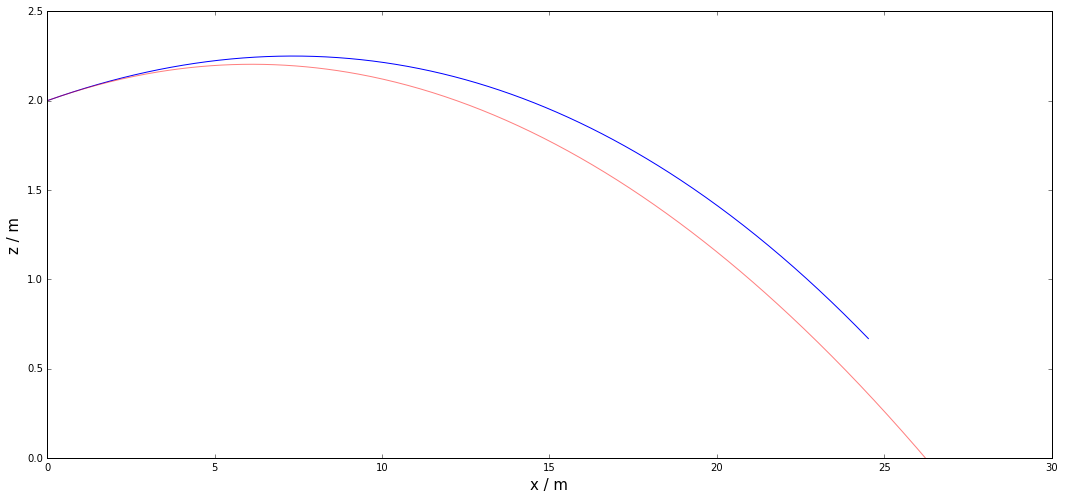

In [12]:
fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(111)

ax.plot(sol[:,3],sol[:,5],'b')
ax.plot(v_0[0]*t,2+v_0[2]*t+0.5*g[2]*t**2,'r',alpha = 0.5)
ax.set_ylim(bottom=0)
ax.set_ylabel('z / m', fontsize = 15)
ax.set_xlabel('x / m', fontsize = 15);